# Import Libraries

In [54]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the Data

In [55]:
df = pd.read_csv("gender_classification_v7.csv")
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


**Get the info**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


- As we can see that this gender_classification_v7.csv dataset contains total 5001 Rows which have index from 0 to 5000 and total 8 columns with the column names as long_hair, forehead_width_cm, forehead_height_cm, forehead_height_cm, nose_wide, nose_long, lips_thin, distance_nose_to_lip_long & gender.

- We can also see that there is only one object datatype column present in the data set, so we will have to encode the gender column.

**Checking for missing values**

In [92]:
 df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

- There are no missing values present in this dataset

**Get descriptive statistics**

In [57]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


- The Given Data consists of facial structures of 5001 persons, the Average forehead height is approximately 6 cm , and the Average forehead width is around 13 cm.

- The minimum forehead height is 5.1 cm and the maximum forehead height is 7.1 cm.

- The standard deviadtion of forehead height is 0.54 cm.

# Converting Gender Data type from object to integer

In [58]:
df['gender'].replace(to_replace='Male', value=1, inplace=True)
df['gender'].replace(to_replace='Female', value=0, inplace=True)

# Exploratory Data Analysis

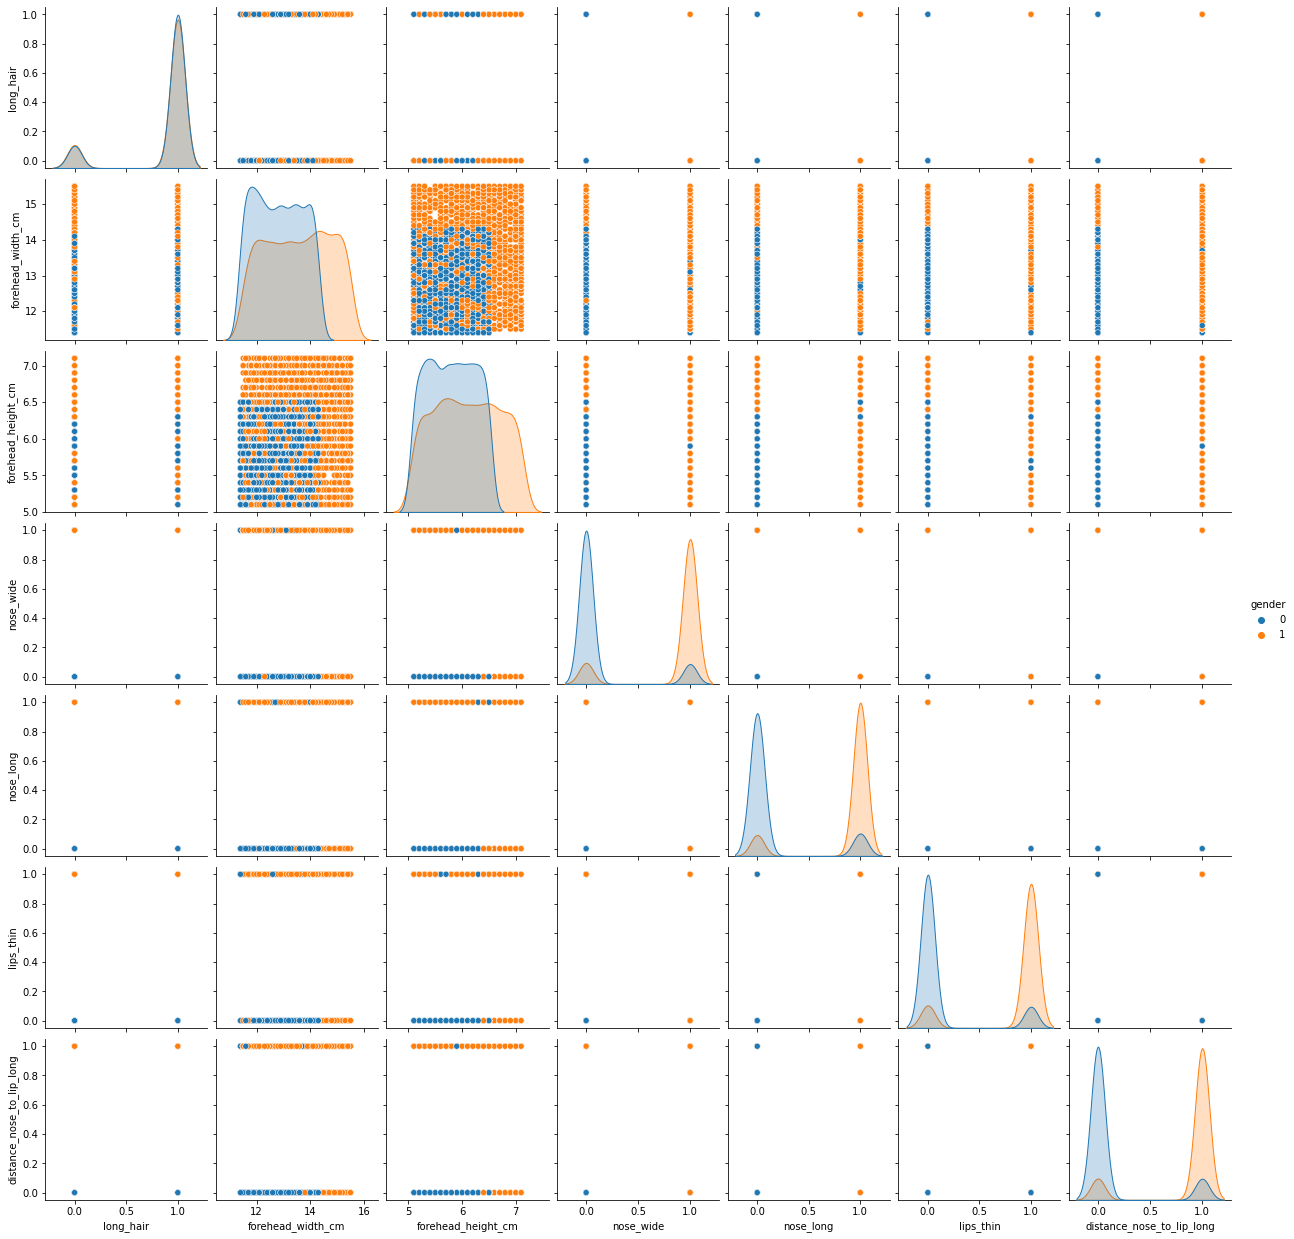

In [6]:
sns.pairplot(df , hue = 'gender')

<AxesSubplot:>

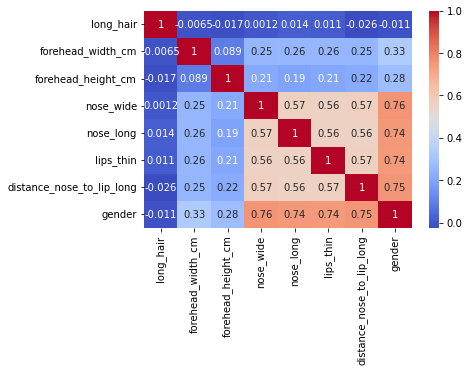

In [7]:
sns.heatmap(df.corr(), cmap= 'coolwarm'  , annot=True)

<AxesSubplot:xlabel='forehead_width_cm', ylabel='forehead_height_cm'>

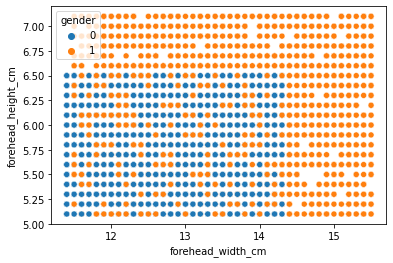

In [8]:
sns.scatterplot (x='forehead_width_cm' , y = 'forehead_height_cm' , hue = 'gender',  data=df)

# Splitting the Data into Features and Target

In [59]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [64]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


**Split the data into training set and testing set using train_test_split**

In [66]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

# Creating the Model

In [67]:
def mymodel(model):
    #model creation
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    #checking bias & variance
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    
    #model evaluation
    print(classification_report(ytest, ypred))
    return model

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [69]:
knn = mymodel(KNeighborsClassifier())

Training Accuracy : 0.9742857142857143
Testing Accuracy : 0.966688874083944


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       745
           1       0.98      0.96      0.97       756

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [70]:
logreg = mymodel(LogisticRegression())

Training Accuracy : 0.968
Testing Accuracy : 0.9673550966022652


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       745
           1       0.97      0.97      0.97       756

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [71]:
svm = mymodel(SVC())

Training Accuracy : 0.9697142857142858
Testing Accuracy : 0.966688874083944


              precision    recall  f1-score   support

           0       0.96      0.97      0.97       745
           1       0.97      0.96      0.97       756

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



# Data Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [74]:
knn = mymodel(KNeighborsClassifier())

Training Accuracy : 0.9754285714285714
Testing Accuracy : 0.9646902065289806


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       745
           1       0.98      0.95      0.96       756

    accuracy                           0.96      1501
   macro avg       0.97      0.96      0.96      1501
weighted avg       0.97      0.96      0.96      1501



In [75]:
logreg = mymodel(LogisticRegression())

Training Accuracy : 0.9677142857142857
Testing Accuracy : 0.9673550966022652


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       745
           1       0.97      0.97      0.97       756

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [76]:
svm = mymodel(SVC())

Training Accuracy : 0.9771428571428571
Testing Accuracy : 0.972018654230513


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       745
           1       0.98      0.96      0.97       756

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



# Conclusion:

- I got maximum accuracy score of 0.97 on Support Vector Machine.